<a href="https://colab.research.google.com/github/onedayzero/Project_2/blob/main/Project_2_Val_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Why a Pro Valorant eSports Team Wins**
- Clint Atterberry


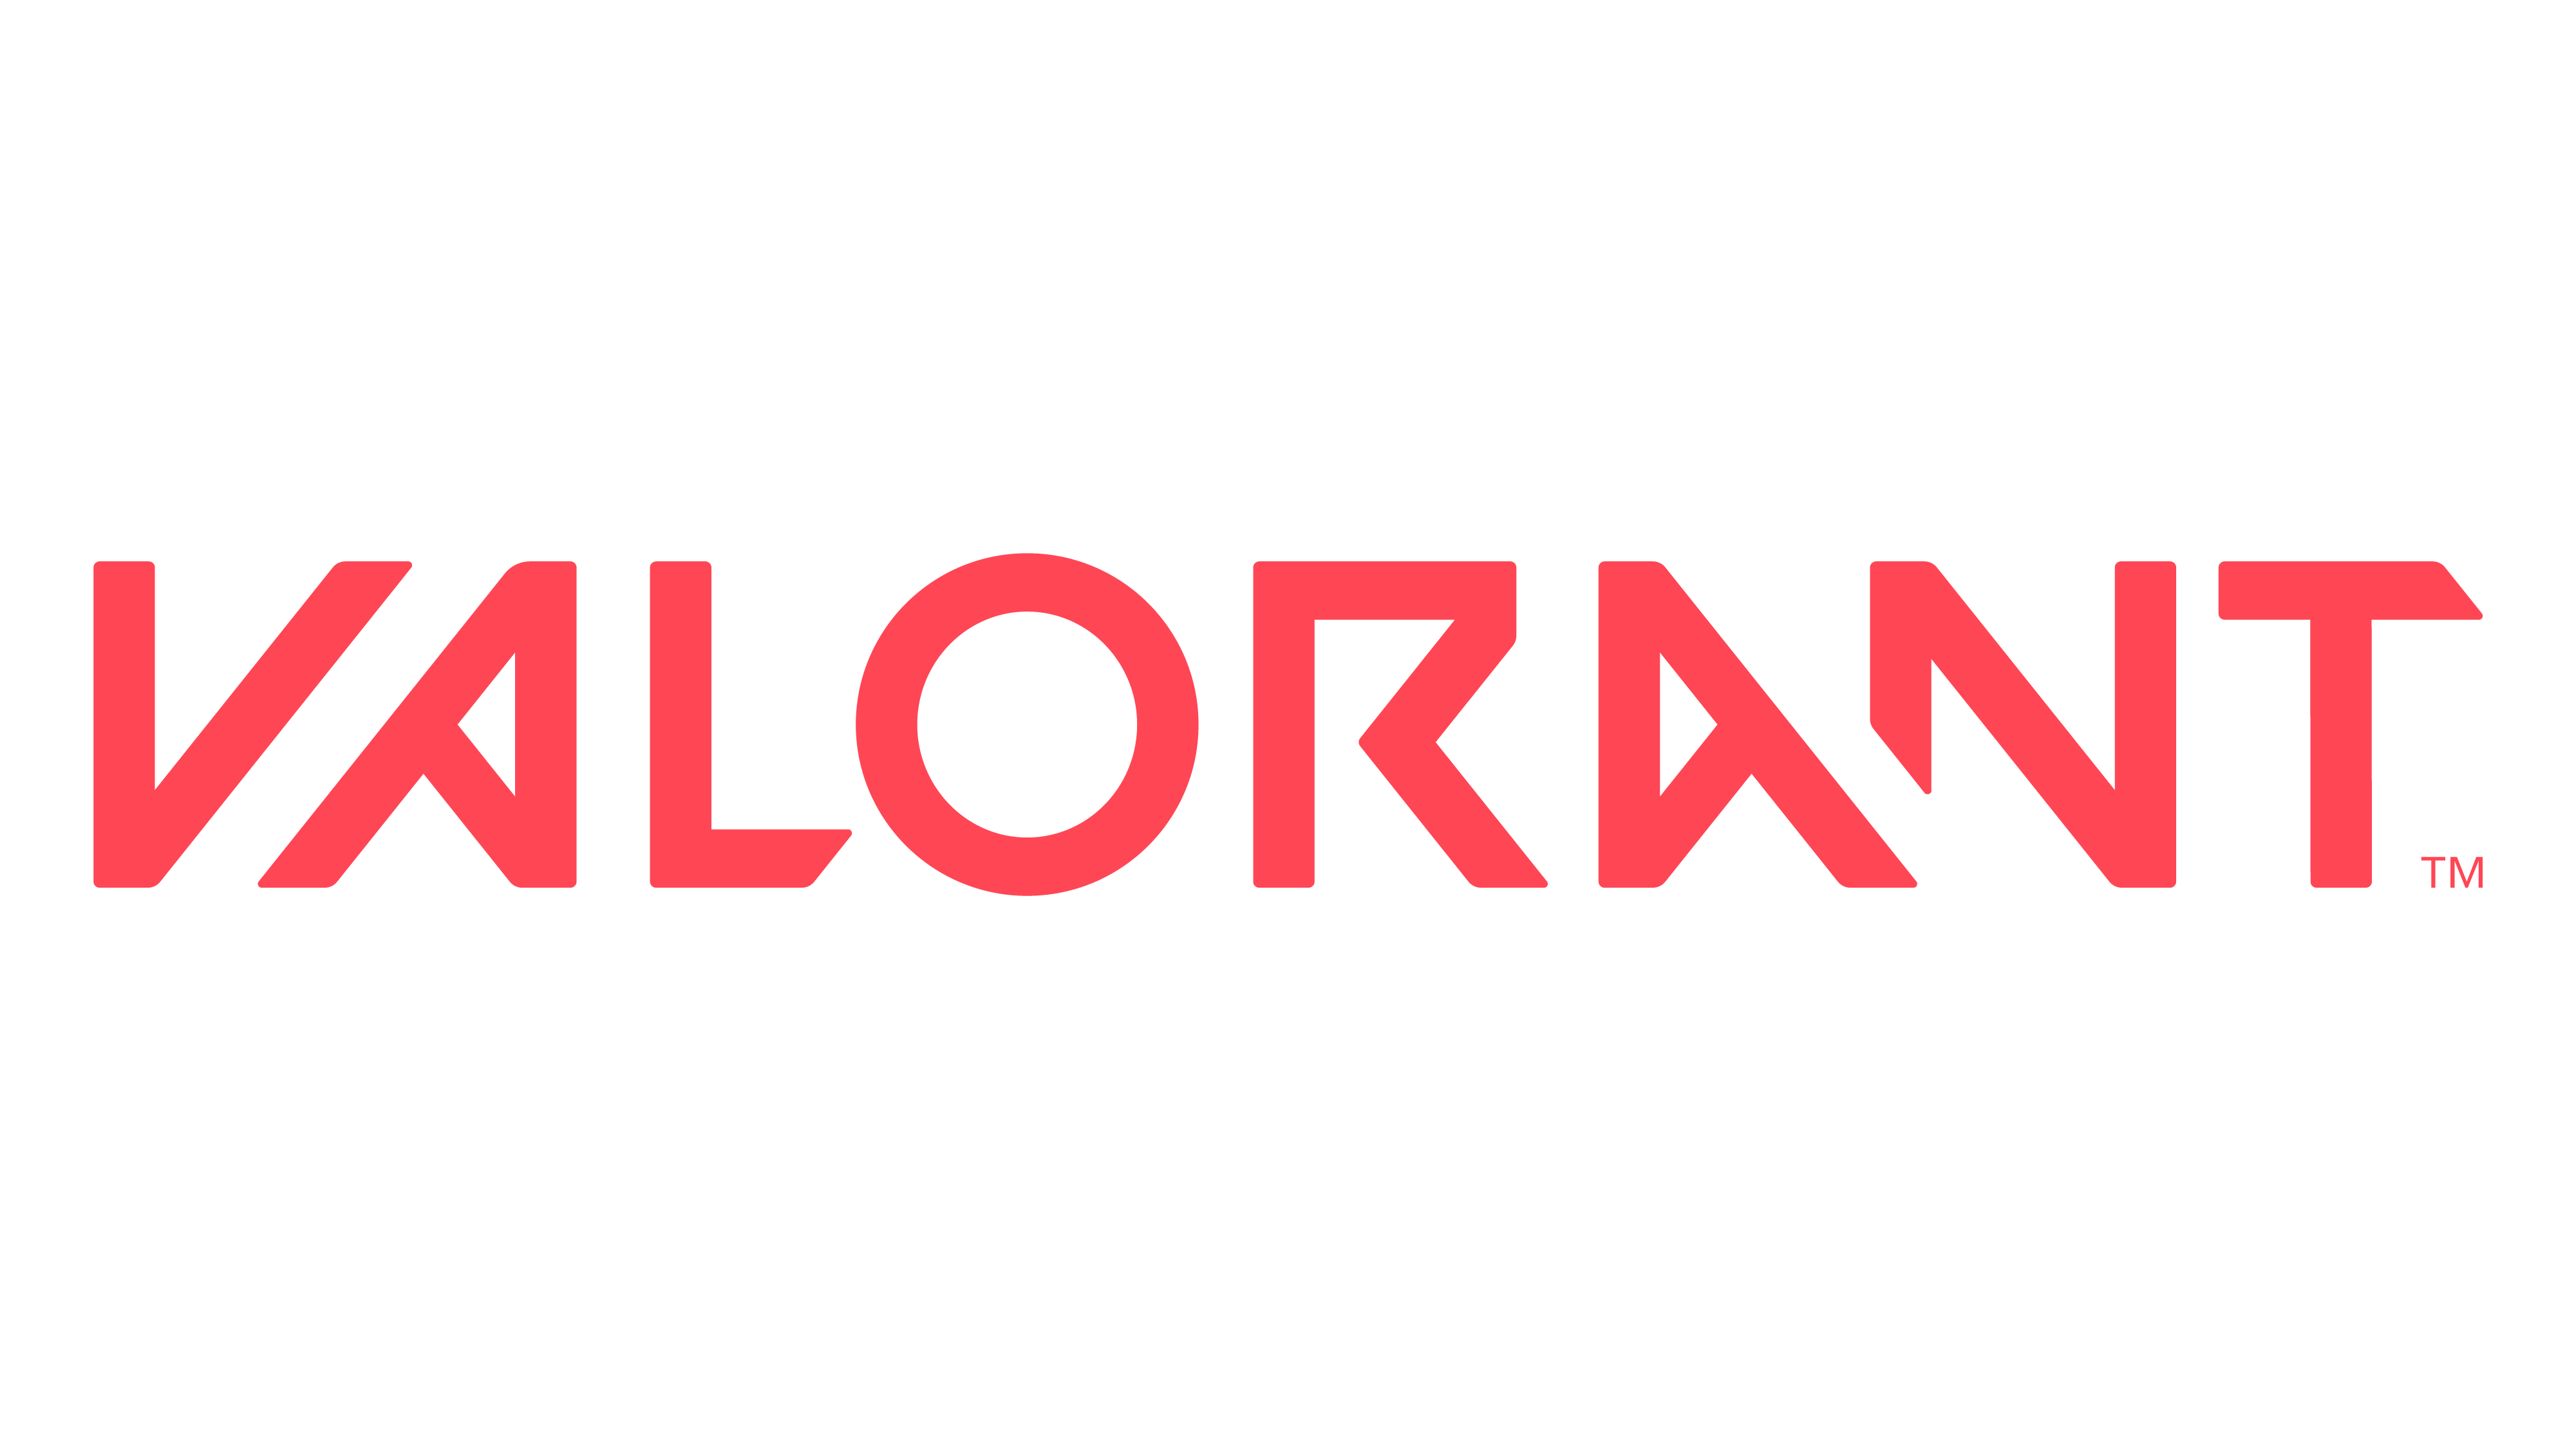

Image from the official Valorant Asset Kit [here](https://playvalorant.com/en-us/news/game-updates/valorant-asset-kit/).

The purpose of this project is to understand the ways a team wins in the game Valorant. Data was collected from over 10,0000 professional matches.

Initial Project Start  (14 July 2022)

1. [x] Deleted unnecessary columns
2. [x] Deleted duplicate rows
3. [x] Identified and addressed missing values 
4. [x] Identified and corrected inconsistencies in data for categorical values
5. [x] Produced univariate visuals for the target and all features
6. [x] Identified outliers
7. [x] Clearly commented all of your cleaning steps and described any decisions you made 

# Setup

## Import Libraries

We will import the libraries we need for this project as we need them.

In [132]:
import pandas as pd     # For DataFrame
import numpy as np

## Load Data

The data was found from Kaggle [here](https://www.kaggle.com/datasets/visualize25/valorant-pro-matches-full-data). We will load it into a variable and view the first 5 rows.

In [133]:
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRgfbORLFSODzyC5OGp0BWGWJ8VD7Vcx9DkjxBdnSgzfjxJmqAXlk-iyb8e6io3dYkjUCWtZuteOIZY/pub?output=csv'
df = pd.read_csv(filename)
df.head()

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,7,...,8.0,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,Pho Real,2,13,...,1.0,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,8,...,9.0,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0
3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,6,...,8.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0
4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,9,...,11.0,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0


In [134]:
df.shape

(15888, 36)

# Delete Unnecessary Columns

*Look at all of the column names.*

In [135]:
df.columns

Index(['GameID', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Team1', 'Team2',
       'Winner', 'Team1_TotalRounds', 'Team2_TotalRounds',
       'Team1_SideFirstHalf', 'Team2_SideFirstHalf', 'Team1_RoundsFirstHalf',
       'Team1_RoundsSecondtHalf', 'Team1_RoundsOT', 'Team2_RoundsFirstHalf',
       'Team2_RoundsSecondtHalf', 'Team2_RoundsOT', 'Team1_PistolWon',
       'Team1_Eco', 'Team1_EcoWon', 'Team1_SemiEco', 'Team1_SemiEcoWon',
       'Team1_SemiBuy', 'Team1_SemiBuyWon', 'Team1_FullBuy',
       'Team1_FullBuyWon', 'Team2_PistolWon', 'Team2_Eco', 'Team2_EcoWon',
       'Team2_SemiEco', 'Team2_SemiEcoWon', 'Team2_SemiBuy',
       'Team2_SemiBuyWon', 'Team2_FullBuy', 'Team2_FullBuyWon'],
      dtype='object')

*I am going to drop columns that do not directly relate to Team1, including all Identifier Variables. Team1_Eco/SemiEco/SemiBuy/FullBuy are round counts, they are not actual data values that will have an effect to the target.*

Target: Team1_Win

In [136]:
df = df.drop(columns=['GameID',
                      'MatchID',
                      'Team1ID',
                      'Team2ID',
                      'Team2',
                      'Team1_TotalRounds',
                      'Team2_TotalRounds',
                      'Team1_RoundsOT',
                      'Team2_RoundsOT',
                      'Team2_SideFirstHalf',
                      'Team2_RoundsFirstHalf',
                      'Team2_RoundsSecondtHalf',
                      'Team2_PistolWon',
                      'Team2_Eco',
                      'Team2_EcoWon',
                      'Team2_SemiEco',
                      'Team2_SemiEcoWon',
                      'Team2_SemiBuy',
                      'Team2_SemiBuyWon',
                      'Team2_FullBuy',
                      'Team2_FullBuyWon',
                      'Team1_Eco',
                      'Team1_SemiEco',
                      'Team1_SemiBuy',
                      'Team1_FullBuy'
                      ])
df.head()

,Map,Team1,Winner,Team1_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_PistolWon,Team1_EcoWon,Team1_SemiEcoWon,Team1_SemiBuyWon,Team1_FullBuyWon
0,Breeze,Booster Seat Gaming,Booster Seat Gaming,defend,7,6,2.0,2.0,0.0,3.0,8.0
1,Bind,Booster Seat Gaming,Pho Real,defend,2,0,0.0,0.0,0.0,1.0,1.0
2,Haven,Booster Seat Gaming,Booster Seat Gaming,attack,8,5,1.0,1.0,1.0,2.0,9.0
3,Icebox,Bjor's Kittens,Bjor's Kittens,defend,7,6,2.0,2.0,0.0,3.0,8.0
4,Haven,Bjor's Kittens,Bjor's Kittens,defend,9,4,1.0,2.0,0.0,0.0,11.0


*I am going to create a new column **'Team1_Win'** which says if Team1 won the match. 1=Won, 0=Lost. Afterwards, I will drop the 'Winner' column. I am doing this because I am keeping the research based on predicting if Team1 won the game. I will also verify if all of the changes have been made to the dataframe successfully.*

In [137]:
df['Team1_Win'] = np.where((df['Team1'] == df['Winner']), 1, 0)
df = df.drop(columns='Winner')
df.columns

Index(['Map', 'Team1', 'Team1_SideFirstHalf', 'Team1_RoundsFirstHalf',
       'Team1_RoundsSecondtHalf', 'Team1_PistolWon', 'Team1_EcoWon',
       'Team1_SemiEcoWon', 'Team1_SemiBuyWon', 'Team1_FullBuyWon',
       'Team1_Win'],
      dtype='object')

*Looking at the data of the new column.*

In [138]:
df['Team1_Win'].value_counts()

1    12261
0     3627
Name: Team1_Win, dtype: int64

The data is very imbalanced, Team1 wins a lot more of the time. This is probably due to the fact that Team1 usually gets to select which map the game is played on, Team2 gets to select if they play attack or defend first. Map selection appears to have a more of an impact than side selection at this stage of the research.

# Duplicated Data

*I will explore the dataframe looking for duplicated rows.*

In [139]:
df.duplicated().sum()

325

*There appers to be 325 duplicated rows. I will remove them all from the dataframe and verify they have been dropped.*

In [140]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Missing Data

*Looking for missing data per column.*

In [141]:
df.isna().sum()

Map                          0
Team1                        0
Team1_SideFirstHalf          0
Team1_RoundsFirstHalf        0
Team1_RoundsSecondtHalf      0
Team1_PistolWon            902
Team1_EcoWon               902
Team1_SemiEcoWon           902
Team1_SemiBuyWon           902
Team1_FullBuyWon           902
Team1_Win                    0
dtype: int64

*A handful of rows have missing data. I believe the best course of action at this time will be to remove those rows. Eventhough there are over 1000 rows missing data, it is less than 10% of the overall dataframe and we will still have over 11,000 rows of data. Afterwards I will verify the rows were dropped.*

In [142]:
df = df.dropna()
df.isna().sum()

Map                        0
Team1                      0
Team1_SideFirstHalf        0
Team1_RoundsFirstHalf      0
Team1_RoundsSecondtHalf    0
Team1_PistolWon            0
Team1_EcoWon               0
Team1_SemiEcoWon           0
Team1_SemiBuyWon           0
Team1_FullBuyWon           0
Team1_Win                  0
dtype: int64

In [143]:
df.shape

(14661, 11)

# Inconsistencies in Data of Categorical Columns

*Starting by exploring the values in 'Map'*

In [144]:
df.Map.value_counts()

Ascent      3589
Haven       3170
Bind        3024
Split       2200
Icebox      1915
Breeze       657
Fracture     106
Name: Map, dtype: int64

*There is are no inconsistencies with the map names.*

*Exploring the Team1 names.*

In [145]:
df.Team1.value_counts()

Renegades          193
Sentinels          137
Soniqs             122
Paper Rex          121
Built By Gamers    121
                  ... 
Arcana               1
LAGOS                1
IC9                  1
Lycus Empire         1
GoodVibes            1
Name: Team1, Length: 1150, dtype: int64

*Out of the 14,661 matches, there are 1,150 unique team names that have played in this dataset. From the listed names they appear to be labeled fine, but there is an incredible amount of different names that would have to be reviewed. At this time, I will keep the values **as-is**.*

In [146]:
df.Team1_SideFirstHalf.value_counts()

defend    7461
attack    7200
Name: Team1_SideFirstHalf, dtype: int64

*SideFirstHalf appears to be fine.*

*'Team1_RoundsSecondtHalf' will be first changed to remove the 't'.*

In [147]:
df.rename(columns = {'Team1_RoundsSecondtHalf':'Team1_RoundsSecondHalf'}, inplace = True)
df.columns

Index(['Map', 'Team1', 'Team1_SideFirstHalf', 'Team1_RoundsFirstHalf',
       'Team1_RoundsSecondHalf', 'Team1_PistolWon', 'Team1_EcoWon',
       'Team1_SemiEcoWon', 'Team1_SemiBuyWon', 'Team1_FullBuyWon',
       'Team1_Win'],
      dtype='object')

*Success!*

# Univariate Visualizations of the Data

*I will create boxplots and histograms of the data to understand the shape of the data in each column.*

Team1_RoundsFirstHalf

count    14661.0
mean         7.0
std          2.0
min          0.0
25%          5.0
50%          7.0
75%          9.0
max         12.0
Name: Team1_RoundsFirstHalf, dtype: float64


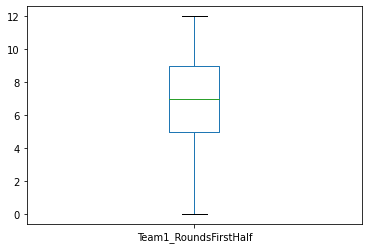

In [148]:
df.boxplot(column = 'Team1_RoundsFirstHalf', grid=False);
print('Team1_RoundsFirstHalf\n')
print(df.Team1_RoundsFirstHalf.describe().round(0))

Team1_RoundsFirstHalf

count    14661.0
mean         7.0
std          2.0
min          0.0
25%          5.0
50%          7.0
75%          9.0
max         12.0
Name: Team1_RoundsFirstHalf, dtype: float64


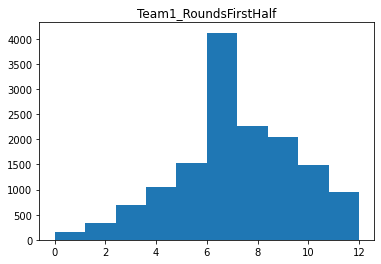

In [149]:
df.hist(column = 'Team1_RoundsFirstHalf', grid=False);
print('Team1_RoundsFirstHalf\n')
print(df.Team1_RoundsFirstHalf.describe().round(0))

*Team 1 tends to win the first half by 2 more rounds than Team 2. Mostly it is slightly over 6 rounds. There are 12 rounds per half, so winning more than 6 means that they are on pace to win the match after the first half of play.*

Team1_RoundsSecondHalf

count    14661.0
mean         5.0
std          2.0
min          0.0
25%          3.0
50%          5.0
75%          6.0
max         12.0
Name: Team1_RoundsSecondHalf, dtype: float64


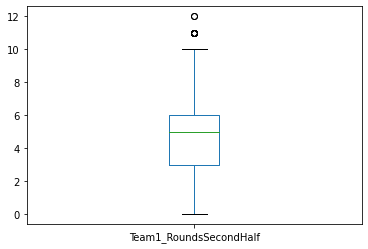

In [150]:
df.boxplot(column = 'Team1_RoundsSecondHalf', grid=False);
print('Team1_RoundsSecondHalf\n')
print(df.Team1_RoundsSecondHalf.describe().round(0))

*There are some outliers at 11 and 12.*

Team1_RoundsSecondHalf

count    14661.0
mean         5.0
std          2.0
min          0.0
25%          3.0
50%          5.0
75%          6.0
max         12.0
Name: Team1_RoundsSecondHalf, dtype: float64


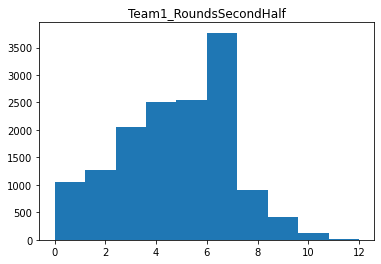

In [151]:
df.hist(column = 'Team1_RoundsSecondHalf', grid=False);
print('Team1_RoundsSecondHalf\n')
print(df.Team1_RoundsSecondHalf.describe().round(0))

*This data is heavily focused below the number 8. This is likely do to the nature of how a team wins a match. They must win 13 rounds. Every match completes the first half but not all matches complete the second half. This column may be looked at being dropped to increase accuracy later.*

Team 1 tends to win the Second half by 2 more rounds than Team 2.

Team1_PistolWon

count    14661.0
mean         1.0
std          1.0
min          0.0
25%          1.0
50%          1.0
75%          2.0
max          2.0
Name: Team1_PistolWon, dtype: float64


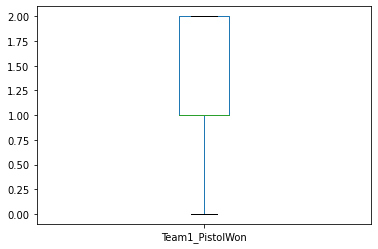

In [152]:
df.boxplot(column = 'Team1_PistolWon', grid=False);
print('Team1_PistolWon\n')
print(df.Team1_PistolWon.describe().round(0))

Team1_PistolWon

count    14661.0
mean         1.0
std          1.0
min          0.0
25%          1.0
50%          1.0
75%          2.0
max          2.0
Name: Team1_PistolWon, dtype: float64


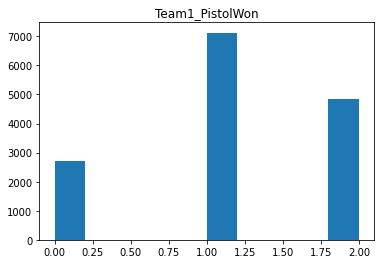

In [153]:
df.hist(column = 'Team1_PistolWon', grid=False);
print('Team1_PistolWon\n')
print(df.Team1_PistolWon.describe().round(0))

*Team1 tends to win the Pistol Rounds. A pistol round occurs at the first round of each half and is an early boost for a team's economy.*

Team1_Win

count    14661.0
mean         1.0
std          0.0
min          0.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Team1_Win, dtype: float64


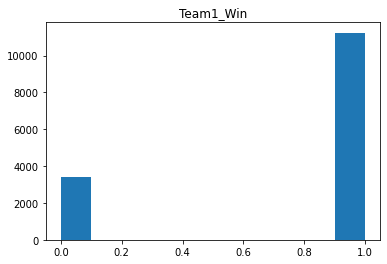

In [154]:
df.hist(column = 'Team1_Win', grid=False);
print('Team1_Win\n')
print(df.Team1_Win.describe().round(0))

*Team1 seems to win more matches by an incredibly large margin.*

# Identified Outliers

*There were two values of outliers with the 'Team1_RoundsSecondHalf'. There may have been more than just the 2, there could have been many games played past 10 rounds due to the nature of the win conditions of the match.*

In [155]:
outliers = df[df['Team1_RoundsSecondHalf']>10]
outliers['Team1_RoundsSecondHalf'].describe()

count    16.000000
mean     11.125000
std       0.341565
min      11.000000
25%      11.000000
50%      11.000000
75%      11.000000
max      12.000000
Name: Team1_RoundsSecondHalf, dtype: float64

*There are 16 values that are past 10, which is the upper fence of the data. I will drop these rows that contain that data.'

In [156]:
df = df[df.Team1_RoundsSecondHalf != 11]
df = df[df.Team1_RoundsSecondHalf != 12]
df['Team1_RoundsSecondHalf'].describe()

count    14645.000000
mean         4.681325
std          2.143381
min          0.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         10.000000
Name: Team1_RoundsSecondHalf, dtype: float64

*Success!*